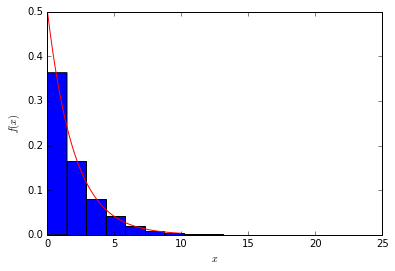

In [279]:
### выбрано экспоненциальное распределение с параметром λ = 0.5. Его можно менять, меняя значение переменной LAMBDА
### положим по определению: scala = 1.0/λ
 

import matplotlib.pyplot as plt
%matplotlib inline
import math
import scipy.stats
from scipy.stats import expon
import numpy as np
import pandas as pd

LAMBDA = 0.5


## функция плотности распределения                   
def f(x):           
    if x<0:
        return 0
    else:
        return LAMDA * math.exp(-LAMBDA * x)
    
##  для экспоненциального распределения с lambda = 0.5 ->  μ = 1/lambda = 2, D = 1 / (lambda**2) = 4
## среднеквадратичное отклонение σ = sqrt(D) = 5

D = 1.0 / (LAMBDA**2) 
SIGMA = 1.0/LAMBDA

sample = expon.rvs(0, 1.0/LAMBDA, size=10000) ## expon.rvs(loc = 0, scala = 1.0/λ, size = 1000) - делаем выборку

# строим гистограмму
plt.hist(sample, bins = 15, normed=True) ## bins - число карманов гистограммы 
plt.ylabel('number of samples')
plt.xlabel('$x$')

# на том же графике построим теоретическую плотность распределения:
x = np.linspace(0,10,1000)
pdf = expon.pdf(x, 0, 1.0 / LAMBDA)
plt.plot(x, pdf, label='theoretical pdf', color = 'red', alpha=1) ## alpha - переменная, отвечающая за цвет линии
plt.ylabel('$f(x)$')
plt.xlabel('$x$')

In [ ]:
## возьмем значения n = 100, 25 и 3000 

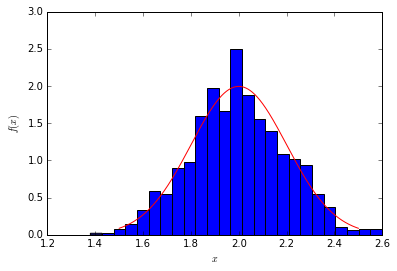

In [278]:
# n = 100

## σ_n = sqrt(D/n) = sqrt(4/100) = 0.2

sample_arrange = []

for i in range(1000):
    local_sample = expon.rvs(0, 1.0/LAMBDA, size=100)
    sum = 0.0
    for x in local_sample:
        sum += x
    sample_arrange.append(sum/100.0)

plt.hist(sample_arrange, bins=25, normed=True)
plt.ylabel('number of samples')
plt.xlabel('$x$')

x = np.linspace(1.5, 2.5, 1000)
pdf = scipy.stats.norm.pdf(x, 2.0, math.sqrt(D/100))
plt.plot(x, pdf, label='theoretical pdf', color = 'red', alpha=1) ## alpha - переменная, отвечающая за цвет линии
plt.ylabel('$f(x)$')
plt.xlabel('$x$')


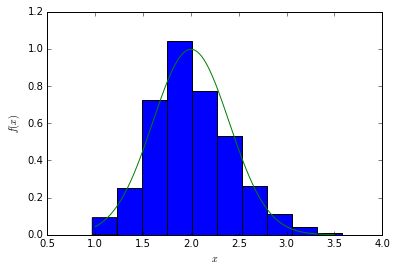

In [275]:
# n = 25
## σ_n = sqrt(D/n) = sqrt(4/25) = 0.4

sample_arrange = []
for i in range(1000):
    local_sample = expon.rvs(0.0, 1.0/LAMBDA,size=25)
    sum = 0.0
    for x in local_sample:
        sum += x
    sample_arrange.append(sum/25.0)

## строим гистограмму
plt.hist(sample_arrange, bins=10, normed=True)

## наше нормальное распределение, которым мы апроксимируем, будет задаваться параметрами: μ=2, σ = 0.16
x = np.linspace(1.0, 3.5, 1000)
pdf = scipy.stats.norm.pdf(x, 2.0, math.sqrt(D/25))
plt.plot(x, pdf, label='theoretical pdf', color = 'red', alpha=1) ## alpha - переменная, отвечающая за цвет линии
plt.ylabel('$f(x)$')
plt.xlabel('$x$')




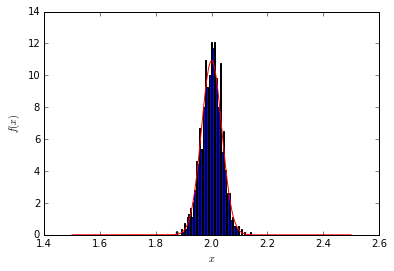

In [277]:
# n = 3000

## σ_n = sqrt(D/n) = sqrt(4/3000) = 0.036514

sample_arrange = []
for i in range(1000):
    sample_local = expon.rvs(0, 1.0/LAMBDA,size=3000)
    sum = 0.0
    for x in sample_local:
        sum += x
    sample_arrange.append(sum/3000.0)

plt.hist(sample_arrange, bins=50, normed=True)
plt.ylabel('number of samples')
plt.xlabel('$x$')

## наше нормальное распределение, которым мы апроксимируем, будет задаваться параметрами: μ=2, σ = 0.037
x = np.linspace(1.5, 2.5, 1000)
pdf = scipy.stats.norm.pdf(x, 2.0, math.sqrt(D/3000))
plt.plot(x, pdf, label='theoretical pdf', color = 'red', alpha=1) ## alpha - переменная, отвечающая за цвет линии
plt.ylabel('$f(x)$')
plt.xlabel('$x$')

In [144]:
## из графиков видно, что при n -> ∞, функция распределения выборочного среднего стремится к функции нормального распределения. 
## Так, при n = 3000 достигается наибольшее сходство с графиком н-распределения
## Заметим, что из последнего графика можно увидеть, что мат. ожидание выбранной случайной величины около 2.0 (при lambda=0.5). 
## Действительно, мат. ожидание экспоненциально распределенной случайной величины = 1/lambda = 1/0.5 = 2